In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [2]:
惡性 = cancer.data[cancer.target == 0]
良性 = cancer.data[cancer.target == 1]
print(惡性.shape)
print(良性.shape)

(212, 30)
(357, 30)


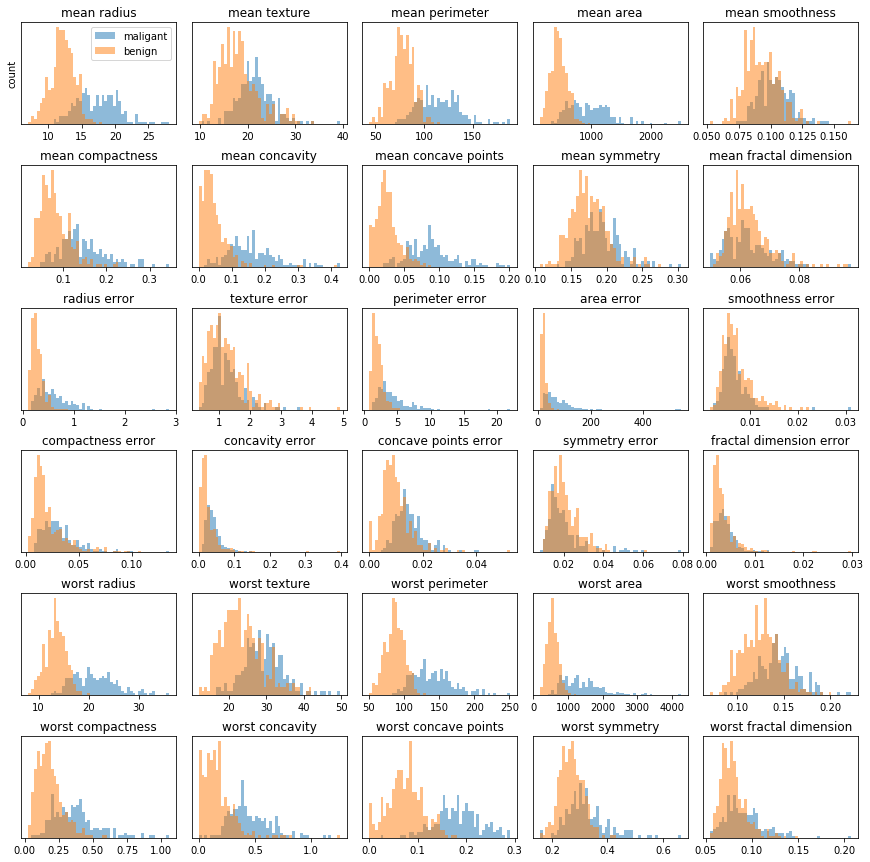

In [3]:
# 分別對惡性、良性腫瘤的數值特徵繪製直方圖
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(6, 5, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.1) #設定子圖的間隔
ax = axes.ravel() # 變更二維圖編號成一維

for i in range(cancer.data.shape[1]):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(惡性[:, i], bins, alpha=0.5)
    ax[i].hist(良性[:, i], bins, alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_ylabel('count')
ax[0].legend(['maligant', 'benign']);

在所有數值特徵的直方圖中，兩個腫瘤類型的數據彼此重疊，似乎難以分辨出良性與惡性的界線。

In [4]:
# 進行 PCA 降到二維
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X_std = scale(cancer.data)
X_std[:2, :]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [5]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('After PCA:', X_pca.shape)
print('Explained variance ratio:', pca.explained_variance_ratio_)

After PCA: (569, 2)
Explained variance ratio: [0.44272026 0.18971182]


只取前兩個主成份，共保留約 63% (= 0.44 + 0.19)的數據變異

In [6]:
# 視覺化 PCA 結果
import pandas as pd

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# 結合腫瘤類型
df = pd.concat([df, pd.DataFrame(cancer.target, columns=['Target'])], axis=1)
惡性_pca = df[df['Target'] == 0]
良性_pca = df[df['Target'] == 1]
print(惡性_pca.shape)
print(良性_pca.shape)

(212, 3)
(357, 3)


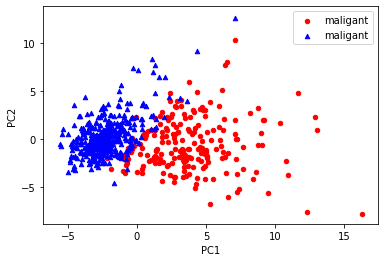

In [7]:
ax = 惡性_pca.plot(kind='scatter', x='PC1', y='PC2', color='r', label='maligant')
良性_pca.plot(kind='scatter', x='PC1', y='PC2', color='b', marker='^', label='maligant', ax=ax)

In [8]:
# 邏輯斯迴歸
from sklearn.linear_model import LogisticRegressionCV

X, y = df.loc[:, 'PC1':'PC2'], df['Target']
clf = LogisticRegressionCV(cv=5).fit(X, y)
clf.score(X, y)

0.9560632688927944

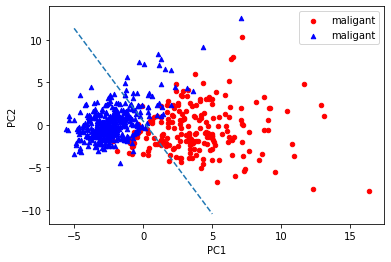

In [9]:
ax = 惡性_pca.plot(kind='scatter', x='PC1', y='PC2', color='r', label='maligant')
良性_pca.plot(kind='scatter', x='PC1', y='PC2', color='b', marker='^', label='maligant', ax=ax)

clf.coef_
x = np.linspace(-5, 5, 100)
y = clf.intercept_ + clf.coef_[0][0]*x
plt.plot(x, y, ls='--')